# Non-invasive Sex Identification of T. granosa Using Machine Learning

## Setting up environment

In [1]:
## Data analysis and wrangling
import numpy as np
import pandas as pd
import random as rnd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config
%matplotlib inline

## Preprocessing
from sklearn.preprocessing import MinMaxScaler

## Load and Preprocess Data

In [2]:
## from github
male_url = "https://raw.githubusercontent.com/Geez-l/litoX/main/SP_ML/datasets/male.csv"
male_litob = pd.read_csv(male_url)

male_litob.head(-1)

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,Umbos Right,Umbos Left,Unnamed: 9
0,110004,43.1,33.05,28.15,21.0,28.5,3.05,NaN,NaN,NaN
1,120004,43.1,33.05,28.15,21.0,28.5,3.05,NaN,NaN,NaN
2,130004,43.1,33.05,28.15,21.0,28.5,3.05,NaN,NaN,NaN
3,140004,43.1,33.05,28.15,21.0,28.5,3.05,NaN,NaN,NaN
4,150004,43.1,33.05,28.15,21.0,28.5,3.05,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
769,110200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
770,120200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
771,130200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
772,140200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
male_litob = male_litob.drop(columns=['Unnamed: 9', 'Umbos Right', 'Umbos Left'])

male_litob.head(-1)

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos
0,110004,43.1,33.05,28.15,21.0,28.5,3.05
1,120004,43.1,33.05,28.15,21.0,28.5,3.05
2,130004,43.1,33.05,28.15,21.0,28.5,3.05
3,140004,43.1,33.05,28.15,21.0,28.5,3.05
4,150004,43.1,33.05,28.15,21.0,28.5,3.05
...,...,...,...,...,...,...,...
769,110200,NaN,NaN,NaN,NaN,NaN,NaN
770,120200,NaN,NaN,NaN,NaN,NaN,NaN
771,130200,NaN,NaN,NaN,NaN,NaN,NaN
772,140200,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Drop rows with NaN values
male_litob = male_litob.dropna()

# Display the updated dataset
male_litob

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos
0,110004,43.1,33.05,28.15,21.00,28.5,3.05
1,120004,43.1,33.05,28.15,21.00,28.5,3.05
2,130004,43.1,33.05,28.15,21.00,28.5,3.05
3,140004,43.1,33.05,28.15,21.00,28.5,3.05
4,150004,43.1,33.05,28.15,21.00,28.5,3.05
...,...,...,...,...,...,...,...
668,120183,61.4,45.05,40.05,40.55,20.0,3.45
669,130183,61.4,45.05,40.05,40.55,20.0,3.45
670,140183,61.4,45.05,40.05,40.55,20.0,3.45
671,150183,61.4,45.05,40.05,40.55,20.0,3.45


In [5]:
male_litob['LW_ratio']= male_litob['Length'] / male_litob['Width']
male_litob['LH_ratio'] = male_litob['Length'] / male_litob['Height']

male_litob

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio
0,110004,43.1,33.05,28.15,21.00,28.5,3.05,1.304085,1.531083
1,120004,43.1,33.05,28.15,21.00,28.5,3.05,1.304085,1.531083
2,130004,43.1,33.05,28.15,21.00,28.5,3.05,1.304085,1.531083
3,140004,43.1,33.05,28.15,21.00,28.5,3.05,1.304085,1.531083
4,150004,43.1,33.05,28.15,21.00,28.5,3.05,1.304085,1.531083
...,...,...,...,...,...,...,...,...,...
668,120183,61.4,45.05,40.05,40.55,20.0,3.45,1.362930,1.533084
669,130183,61.4,45.05,40.05,40.55,20.0,3.45,1.362930,1.533084
670,140183,61.4,45.05,40.05,40.55,20.0,3.45,1.362930,1.533084
671,150183,61.4,45.05,40.05,40.55,20.0,3.45,1.362930,1.533084


In [6]:
## from github
female_url = "https://raw.githubusercontent.com/Geez-l/litoX/main/SP_ML/datasets/female.csv"
female_litob = pd.read_csv(female_url)

female_litob.head(-1)

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,Umbos Right,Umbos Left
0,10001,48.05,37.60,32.15,20.0,33.55,4.10,NaN,NaN
1,20001,48.05,37.60,32.15,20.0,33.55,4.10,NaN,NaN
2,30001,48.05,37.60,32.15,20.0,33.55,4.10,NaN,NaN
3,40001,48.05,37.60,32.15,20.0,33.55,4.10,NaN,NaN
4,50001,48.05,37.60,32.15,20.0,33.55,4.10,NaN,NaN
...,...,...,...,...,...,...,...,...,...
425,10201,55.35,44.05,39.30,20.0,39.40,4.55,23.2,21.05
426,20201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
427,30201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
428,40201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
female_litob = female_litob.drop(columns=['Umbos Right', 'Umbos Left'])

female_litob.head(-1)

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos
0,10001,48.05,37.60,32.15,20.0,33.55,4.10
1,20001,48.05,37.60,32.15,20.0,33.55,4.10
2,30001,48.05,37.60,32.15,20.0,33.55,4.10
3,40001,48.05,37.60,32.15,20.0,33.55,4.10
4,50001,48.05,37.60,32.15,20.0,33.55,4.10
...,...,...,...,...,...,...,...
425,10201,55.35,44.05,39.30,20.0,39.40,4.55
426,20201,NaN,NaN,NaN,NaN,NaN,NaN
427,30201,NaN,NaN,NaN,NaN,NaN,NaN
428,40201,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Drop rows with NaN values
female_litob = female_litob.dropna()

# Display the updated dataset
female_litob

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos
0,10001,48.05,37.60,32.15,20.0,33.55,4.10
1,20001,48.05,37.60,32.15,20.0,33.55,4.10
2,30001,48.05,37.60,32.15,20.0,33.55,4.10
3,40001,48.05,37.60,32.15,20.0,33.55,4.10
4,50001,48.05,37.60,32.15,20.0,33.55,4.10
...,...,...,...,...,...,...,...
421,30142,38.50,30.05,26.05,20.0,20.05,3.05
422,40142,38.50,30.05,26.05,20.0,20.05,3.05
423,50142,38.50,30.05,26.05,20.0,20.05,3.05
424,60142,38.50,30.05,26.05,20.0,20.05,3.05


In [9]:
# Convert 'Length', 'Width', and 'Height' columns to numeric type
female_litob['Length'] = pd.to_numeric(female_litob['Length'], errors='coerce')
female_litob['Width'] = pd.to_numeric(female_litob['Width'], errors='coerce')
female_litob['Height'] = pd.to_numeric(female_litob['Height'], errors='coerce')

# Now calculate the ratios
female_litob['LW_ratio']= female_litob['Length'] / female_litob['Width']
female_litob['LH_ratio'] = female_litob['Length'] / female_litob['Height']

female_litob

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio
0,10001,48.05,37.60,32.15,20.0,33.55,4.10,1.277926,1.494557
1,20001,48.05,37.60,32.15,20.0,33.55,4.10,1.277926,1.494557
2,30001,48.05,37.60,32.15,20.0,33.55,4.10,1.277926,1.494557
3,40001,48.05,37.60,32.15,20.0,33.55,4.10,1.277926,1.494557
4,50001,48.05,37.60,32.15,20.0,33.55,4.10,1.277926,1.494557
...,...,...,...,...,...,...,...,...,...
421,30142,38.50,30.05,26.05,20.0,20.05,3.05,1.281198,1.477927
422,40142,38.50,30.05,26.05,20.0,20.05,3.05,1.281198,1.477927
423,50142,38.50,30.05,26.05,20.0,20.05,3.05,1.281198,1.477927
424,60142,38.50,30.05,26.05,20.0,20.05,3.05,1.281198,1.477927


In [10]:
female_litob['Label'] = 0
male_litob['Label'] = 1

In [11]:
litob_combined = pd.concat([female_litob, male_litob], ignore_index=True)
litob_combined

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio,Label
0,10001,48.05,37.60,32.15,20.00,33.55,4.10,1.277926,1.494557,0
1,20001,48.05,37.60,32.15,20.00,33.55,4.10,1.277926,1.494557,0
2,30001,48.05,37.60,32.15,20.00,33.55,4.10,1.277926,1.494557,0
3,40001,48.05,37.60,32.15,20.00,33.55,4.10,1.277926,1.494557,0
4,50001,48.05,37.60,32.15,20.00,33.55,4.10,1.277926,1.494557,0
...,...,...,...,...,...,...,...,...,...,...
1094,120183,61.40,45.05,40.05,40.55,20.00,3.45,1.362930,1.533084,1
1095,130183,61.40,45.05,40.05,40.55,20.00,3.45,1.362930,1.533084,1
1096,140183,61.40,45.05,40.05,40.55,20.00,3.45,1.362930,1.533084,1
1097,150183,61.40,45.05,40.05,40.55,20.00,3.45,1.362930,1.533084,1


In [12]:
# remove Litob_id column

if 'Litob_id' in litob_combined.columns:
    litob_combined = litob_combined.drop('Litob_id', axis=1)

litob_combined

,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio,Label
0,48.05,37.60,32.15,20.00,33.55,4.10,1.277926,1.494557,0
1,48.05,37.60,32.15,20.00,33.55,4.10,1.277926,1.494557,0
2,48.05,37.60,32.15,20.00,33.55,4.10,1.277926,1.494557,0
3,48.05,37.60,32.15,20.00,33.55,4.10,1.277926,1.494557,0
4,48.05,37.60,32.15,20.00,33.55,4.10,1.277926,1.494557,0
...,...,...,...,...,...,...,...,...,...
1094,61.40,45.05,40.05,40.55,20.00,3.45,1.362930,1.533084,1
1095,61.40,45.05,40.05,40.55,20.00,3.45,1.362930,1.533084,1
1096,61.40,45.05,40.05,40.55,20.00,3.45,1.362930,1.533084,1
1097,61.40,45.05,40.05,40.55,20.00,3.45,1.362930,1.533084,1


In [13]:
# Drop duplicate rows based on all columns
litob_combined = litob_combined.drop_duplicates()

litob_combined

,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio,Label
0,48.05,37.60,32.15,20.00,33.55,4.10,1.277926,1.494557,0
6,47.40,32.50,32.25,20.00,33.10,3.05,1.458462,1.469767,0
12,43.30,34.10,31.25,21.00,32.05,4.50,1.269795,1.385600,0
18,50.05,35.05,32.05,21.00,30.05,4.10,1.427960,1.561622,0
24,40.25,33.55,32.40,20.00,29.35,3.40,1.199702,1.242284,0
...,...,...,...,...,...,...,...,...,...
1069,56.40,41.30,37.05,36.45,20.00,4.30,1.365617,1.522267,1
1075,54.25,42.40,38.25,35.05,20.00,2.05,1.279481,1.418301,1
1081,54.15,41.05,35.05,34.45,20.00,4.05,1.319123,1.544936,1
1087,59.70,44.35,39.55,38.55,20.00,4.30,1.346110,1.509482,1


### Data Exploration

In [14]:
features = ['Length', 'Width', 'Height', 'Rib count', 'Length (Hinge Line)', 'Distance Umbos', 'LW_ratio', 'LH_ratio']
litob_combined[features].head()

,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio
0,48.05,37.60,32.15,20.0,33.55,4.10,1.277926,1.494557
6,47.40,32.50,32.25,20.0,33.10,3.05,1.458462,1.469767
12,43.30,34.10,31.25,21.0,32.05,4.50,1.269795,1.385600
18,50.05,35.05,32.05,21.0,30.05,4.10,1.427960,1.561622
24,40.25,33.55,32.40,20.0,29.35,3.40,1.199702,1.242284


In [15]:
from scipy.stats import shapiro, mannwhitneyu

# List of features to test
features = ['Length', 'Width', 'Height', 'Rib count', 'Length (Hinge Line)', 'Distance Umbos', 'LW_ratio', 'LH_ratio']

# Alpha level for the test
alpha = 0.05

# Loop through each feature to perform normality and Mann-Whitney U test
for feature in features:
    # Perform Shapiro-Wilk test for normality
    shapiro_test = shapiro(litob_combined[feature])

    # Print the Shapiro-Wilk test results
    print(f"Feature: {feature}")
    print(f"Shapiro-Wilk Test Statistic: {shapiro_test.statistic}")
    print(f"P-value: {shapiro_test.pvalue:.10f}")  # Display with 10 decimal places

    # Interpret the normality test
    if shapiro_test.pvalue > alpha:
        print("Data is normally distributed. Proceeding with independent sample T-test.")
        # If normally distributed, perform an independent sample T-test
        male_data = litob_combined[litob_combined['Label'] == 1][feature]
        female_data = litob_combined[litob_combined['Label'] == 0][feature]

        # Print the results for the T-test (optional)
        print(f"T-test for {feature} not implemented in this code snippet.")
    else:
        print("Data is not normally distributed. Proceeding with Mann-Whitney U test.")
        # Perform Mann-Whitney U test if data is not normally distributed
        male_data = litob_combined[litob_combined['Label'] == 1][feature]
        female_data = litob_combined[litob_combined['Label'] == 0][feature]

        # Perform the Mann-Whitney U test
        statistic, p_value = mannwhitneyu(male_data, female_data, alternative='two-sided')

        # Print the Mann-Whitney U test results
        print(f"Mann-Whitney U Test Statistic: {statistic}")
        print(f"P-value: {p_value:.10f}")

        # Interpret the results
        if p_value > alpha:
            print(f"There is no significant difference between the {feature} of male and female litob.\n")
        else:
            print(f"There is a significant difference between the {feature} of male and female litob.\n")


Feature: Length
Shapiro-Wilk Test Statistic: 0.9330704512707195
P-value: 0.0000001446
Data is not normally distributed. Proceeding with Mann-Whitney U test.
Mann-Whitney U Test Statistic: 4260.5
P-value: 0.7054534458
There is no significant difference between the Length of male and female litob.

Feature: Width
Shapiro-Wilk Test Statistic: 0.949447122962222
P-value: 0.0000036098
Data is not normally distributed. Proceeding with Mann-Whitney U test.
Mann-Whitney U Test Statistic: 4564.0
P-value: 0.2207033810
There is no significant difference between the Width of male and female litob.

Feature: Height
Shapiro-Wilk Test Statistic: 0.9511585727652697
P-value: 0.0000052127
Data is not normally distributed. Proceeding with Mann-Whitney U test.
Mann-Whitney U Test Statistic: 3840.0
P-value: 0.4282573625
There is no significant difference between the Height of male and female litob.

Feature: Rib count
Shapiro-Wilk Test Statistic: 0.4562458610590051
P-value: 0.0000000000
Data is not normally

In [16]:
import pandas as pd
from scipy.stats import shapiro, mannwhitneyu

results = []

# List of features to test
features = ['Length', 'Width', 'Height', 'Rib count', 'Length (Hinge Line)', 'Distance Umbos', 'LW_ratio', 'LH_ratio']

# Alpha level for the test
alpha = 0.05

# Loop through each feature to perform normality and Mann-Whitney U test
for feature in features:
    # Perform Shapiro-Wilk test for normality
    shapiro_test = shapiro(litob_combined[feature])

    # Perform Mann-Whitney U test
    male_data = litob_combined[litob_combined['Label'] == 1][feature]
    female_data = litob_combined[litob_combined['Label'] == 0][feature]
    statistic, p_value = mannwhitneyu(male_data, female_data, alternative='two-sided')

    # Store results in a dictionary
    result = {
        'Variable Name': feature,
        'Distribution': 'Normal' if shapiro_test.pvalue > alpha else 'Non-normal',
        'Test used': 'Mann-Whitney U test',
        'p-value': p_value,
        'Implication': 'No significant difference' if p_value > alpha else 'Significant difference'
    }
    results.append(result)

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Display the results DataFrame
results_df

,Variable Name,Distribution,Test used,p-value,Implication
0,Length,Non-normal,Mann-Whitney U test,0.705453,No significant difference
1,Width,Non-normal,Mann-Whitney U test,0.220703,No significant difference
2,Height,Non-normal,Mann-Whitney U test,0.428257,No significant difference
3,Rib count,Non-normal,Mann-Whitney U test,0.005248,Significant difference
4,Length (Hinge Line),Non-normal,Mann-Whitney U test,0.038699,Significant difference
5,Distance Umbos,Non-normal,Mann-Whitney U test,0.039638,Significant difference
6,LW_ratio,Non-normal,Mann-Whitney U test,0.075391,No significant difference
7,LH_ratio,Non-normal,Mann-Whitney U test,0.036079,Significant difference


In [17]:
from sklearn.preprocessing import MinMaxScaler

# columns to scale excluding the label
cols_to_scale = ['Length', 'Width', 'Height', 'Rib count', 'Length (Hinge Line)', 'Distance Umbos', 'LW_ratio', 'LH_ratio']

scaler = MinMaxScaler()

# Fit and transform the selected columns
litob_combined[cols_to_scale] = scaler.fit_transform(litob_combined[cols_to_scale])

# Display the scaled DataFrame
litob_combined

<ipython-input-17-4c19414d8a76>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  litob_combined[cols_to_scale] = scaler.fit_transform(litob_combined[cols_to_scale])


,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio,Label
0,0.373832,0.425000,0.405530,0.109091,0.595092,0.089706,0.282637,0.463827,0
6,0.349533,0.193182,0.410138,0.109091,0.576687,0.058824,0.595267,0.425835,0
12,0.196262,0.265909,0.364055,0.145455,0.533742,0.101471,0.268557,0.296838,0
18,0.448598,0.309091,0.400922,0.145455,0.451943,0.089706,0.542448,0.566613,0
24,0.082243,0.240909,0.417051,0.109091,0.423313,0.069118,0.147179,0.077190,0
...,...,...,...,...,...,...,...,...,...
1069,0.685981,0.593182,0.631336,0.707273,0.040900,0.095588,0.434491,0.506297,1
1075,0.605607,0.643182,0.686636,0.656364,0.040900,0.029412,0.285331,0.346956,1
1081,0.601869,0.581818,0.539171,0.634545,0.040900,0.088235,0.353977,0.541039,1
1087,0.809346,0.731818,0.746544,0.783636,0.040900,0.095588,0.400711,0.486701,1


In [18]:
litob_combined.to_csv('litob_combined.csv', index=False)

## Dataset Inspection and Visualizations

In [19]:
litob_combined.columns

Index(['Length', 'Width', 'Height', 'Rib count', 'Length (Hinge Line)',
       'Distance Umbos', 'LW_ratio', 'LH_ratio', 'Label'],
      dtype='object')

array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Width'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Rib count'}>,
        <Axes: title={'center': 'Length (Hinge Line)'}>,
        <Axes: title={'center': 'Distance Umbos'}>],
       [<Axes: title={'center': 'LW_ratio'}>,
        <Axes: title={'center': 'LH_ratio'}>, <Axes: >]], dtype=object)

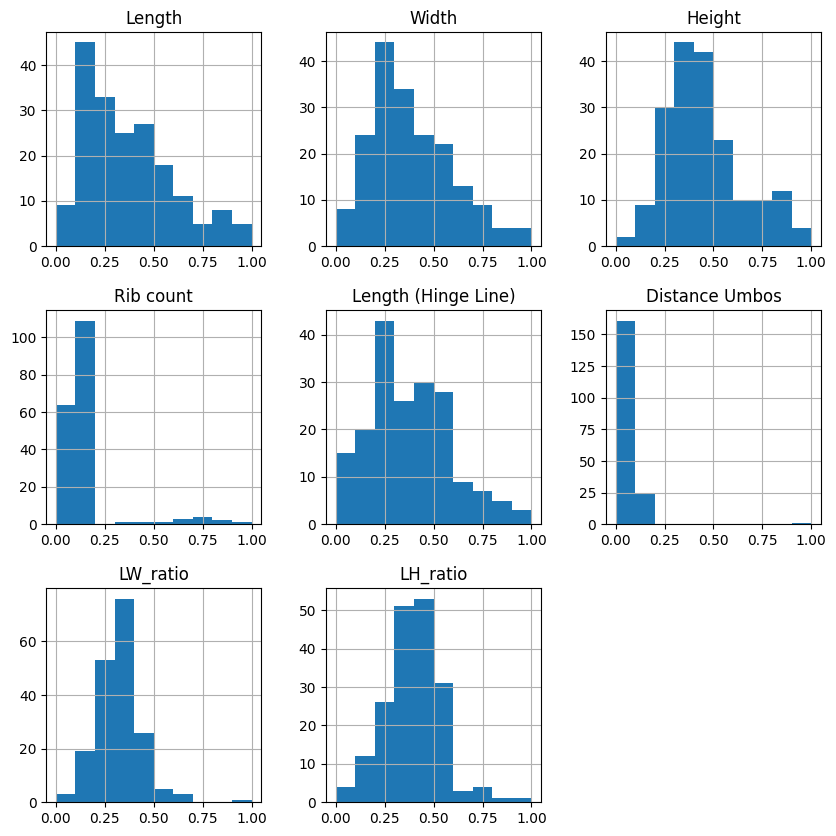

In [20]:
litob_combined_explore = litob_combined.drop(columns=['Label'], errors = 'ignore')
litob_combined_explore.hist(figsize = (10, 10))

In [21]:
litob_combined_explore.describe()

,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,0.368717,0.389164,0.449158,0.140078,0.376698,0.066730,0.326090,0.397360
std,0.225335,0.207196,0.195631,0.160544,0.210502,0.076297,0.116738,0.143303
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.191121,0.221023,0.312788,0.072727,0.223926,0.033824,0.259905,0.309009
50%,0.336449,0.354545,0.412442,0.109091,0.348671,0.058824,0.321944,0.398922
75%,0.501869,0.506250,0.539171,0.109091,0.508691,0.088235,0.381521,0.484887
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
litob_combined.Label.value_counts()

,count
Label,
1,113
0,73


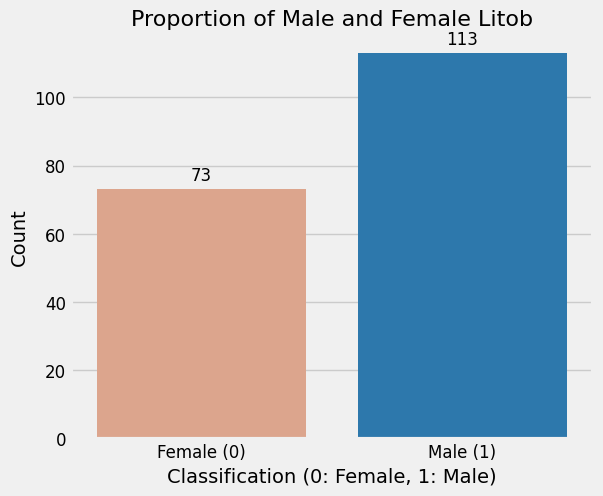

Proportions of Classes:


,count
Label,
1,0.607527
0,0.392473


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.figure(figsize=(6, 5))

# Define custom color palette with integer keys
colors = {0: "#e9a080", 1: "#187cc1"}  # Changed keys to integers

# Assign 'Label' to 'hue' and set legend=False
ax = sns.countplot(x='Label', data=litob_combined, hue='Label', palette=colors, legend=False)
plt.xlabel('Classification (0: Female, 1: Male)', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.title('Proportion of Male and Female Litob', fontsize=16)
plt.xticks(ticks=[0, 1], labels=['Female (0)', 'Male (1)'], fontsize=12)
plt.yticks(fontsize=12)

# Add count numbers to the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),  # Converted to int
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.show()

counts = litob_combined.Label.value_counts()
proportions = counts / counts.sum()
print('Proportions of Classes:')
proportions

In [24]:
litob_features = litob_combined.columns.drop(['Label'])
x = litob_combined[litob_features]
y = litob_combined['Label']

variable_corr = pd.concat([x, y], axis=1)
variable_corr

,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio,Label
0,0.373832,0.425000,0.405530,0.109091,0.595092,0.089706,0.282637,0.463827,0
6,0.349533,0.193182,0.410138,0.109091,0.576687,0.058824,0.595267,0.425835,0
12,0.196262,0.265909,0.364055,0.145455,0.533742,0.101471,0.268557,0.296838,0
18,0.448598,0.309091,0.400922,0.145455,0.451943,0.089706,0.542448,0.566613,0
24,0.082243,0.240909,0.417051,0.109091,0.423313,0.069118,0.147179,0.077190,0
...,...,...,...,...,...,...,...,...,...
1069,0.685981,0.593182,0.631336,0.707273,0.040900,0.095588,0.434491,0.506297,1
1075,0.605607,0.643182,0.686636,0.656364,0.040900,0.029412,0.285331,0.346956,1
1081,0.601869,0.581818,0.539171,0.634545,0.040900,0.088235,0.353977,0.541039,1
1087,0.809346,0.731818,0.746544,0.783636,0.040900,0.095588,0.400711,0.486701,1


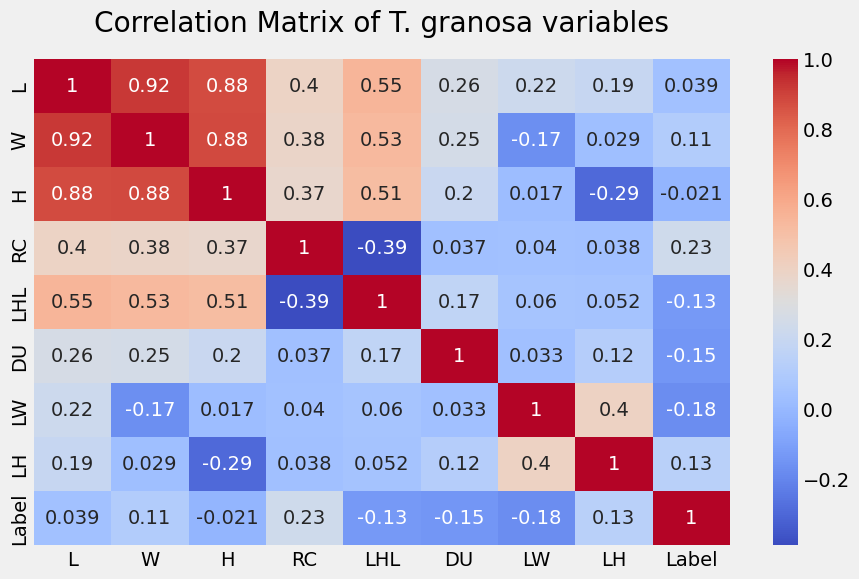

In [25]:
# Define a dictionary to map original column names to codenames
codenames = {
    'Length': 'L',
    'Width': 'W',
    'Height': 'H',
    'Rib count': 'RC',
    'Length (Hinge Line)': 'LHL',
    'Distance Umbos': 'DU',
    'LW_ratio': 'LW',
    'LH_ratio': 'LH',
    'Label': 'Label'
}

# Rename the columns of variable_corr using the codenames
variable_corr = variable_corr.rename(columns=codenames)

# Now calculate the correlation and plot the heatmap
corr = variable_corr.corr()
plt.figure(figsize=(10, 6))
plt.title('Correlation Matrix of T. granosa variables', pad=20)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [28]:
# Calculate mean and standard deviation for each feature, grouped by sex
grouped_data = litob_combined.groupby('Label')[features].agg(['mean', 'std'])

# Display the table
grouped_data

Length               Width              Height           Rib count  \
           mean       std      mean       std      mean       std      mean   
Label                                                                         
0      0.357701  0.212171  0.361582  0.193908  0.454327  0.174415  0.094147   
1      0.375833  0.234097  0.406983  0.214299  0.445818  0.208881  0.169751   

                Length (Hinge Line)           Distance Umbos            \
            std                mean       std           mean       std   
Label                                                                    
0      0.030203            0.411715  0.193851       0.080540  0.114010   
1      0.199308            0.354076  0.218448       0.057808  0.032478   

       LW_ratio            LH_ratio            
           mean       std      mean       std  
Label                                          
0      0.351553  0.147315  0.373533  0.135813  
1      0.309639  0.088676  0.412752  0.146471

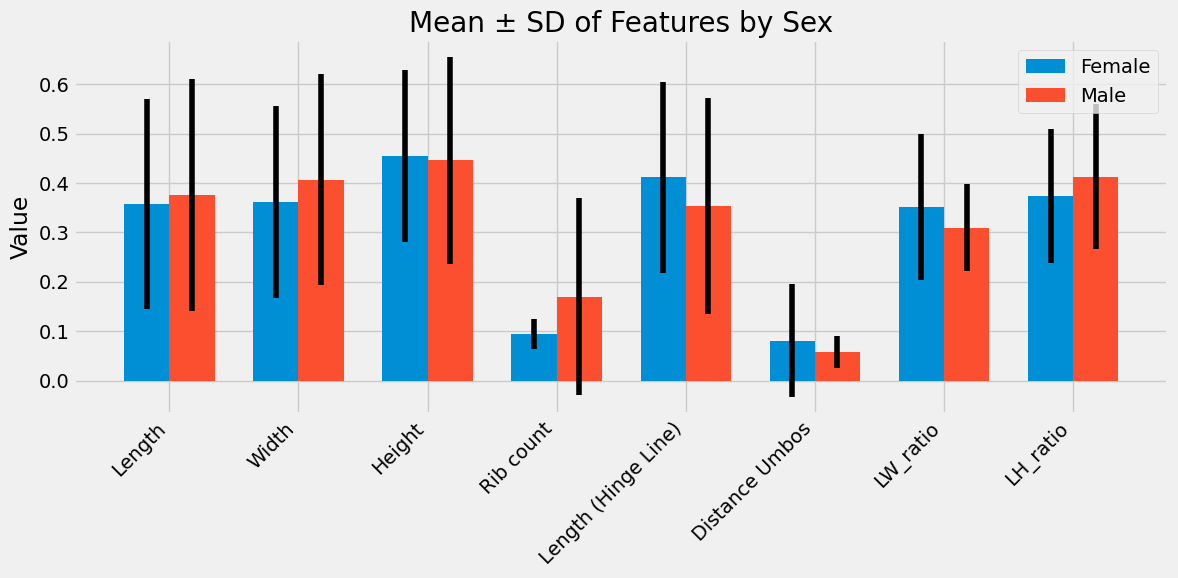

In [29]:
# Calculate mean and standard deviation for each feature, grouped by sex
grouped_data = litob_combined.groupby('Label')[features].agg(['mean', 'std'])

# Create the plot
plt.figure(figsize=(12, 6))

x = range(len(features))
width = 0.35

for i, sex in enumerate([0, 1]):  # Iterate through female (0) and male (1) groups
    # Accessing 'mean' and 'std' correctly using MultiIndex column names
    means = grouped_data.loc[sex, [('Length', 'mean'), ('Width', 'mean'), ('Height', 'mean'), ('Rib count', 'mean'), ('Length (Hinge Line)', 'mean'), ('Distance Umbos', 'mean'), ('LW_ratio', 'mean'), ('LH_ratio', 'mean')]]  # Access 'mean' using MultiIndex column names
    stds = grouped_data.loc[sex, [('Length', 'std'), ('Width', 'std'), ('Height', 'std'), ('Rib count', 'std'), ('Length (Hinge Line)', 'std'), ('Distance Umbos', 'std'), ('LW_ratio', 'std'), ('LH_ratio', 'std')]]  # Access 'std' using MultiIndex column names

    plt.bar([xi + i * width for xi in x], means, width, yerr=stds, label=f"{'Female' if sex == 0 else 'Male'}")

plt.xticks([xi + width / 2 for xi in x], features, rotation=45, ha="right")
plt.ylabel("Value")
plt.title("Mean ± SD of Features by Sex")
plt.legend()
plt.tight_layout()
plt.show()